In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Linear Regression Assignment - Boom Bike Sharing


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [3]:
bikes=pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Inspect the various aspects of the bikes dataframe
bikes.shape

(730, 16)

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking for null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Conclusions:

    There are no null values in the dataframe

# Step 2 Preprocessing steps

In [9]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Dropping dteday which is same as month and year  and instant(record index) not required for further analysis
# Dropping 'Casual' and 'registered' because count=Casual + registered
bikes.drop(['dteday', 'instant'], axis=1, inplace=True)
bikes.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
# Map variable to categorical values


bikes['season']=bikes.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
bikes['mnth']=bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weathersit']=bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy rain+Snow + Fog'})
bikes['weekday']=bikes.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [12]:
# Renaming columns
bikes.rename(columns = {'yr':'Year', 'mnth':'Month',
                              'hum':'humidity','cnt': 'Count'}, inplace = True)

In [13]:
bikes.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,Count
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Months')

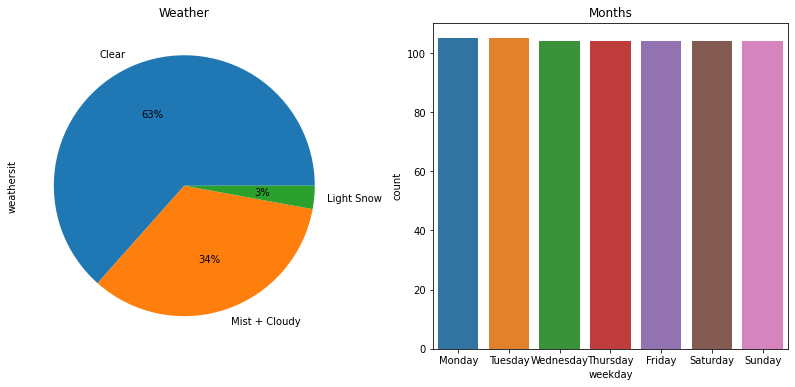

In [14]:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
bikes.weathersit.value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.title("Weather")

plt.subplot(1,2,2)
sns.countplot(bikes.weekday)
plt.title("Months")

### Bivariate  analysis

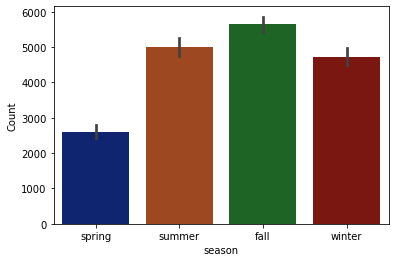

In [15]:
# Relation between Season and target variable(cnt)


sns.barplot('season','Count',data=bikes,palette="dark")
plt.show()

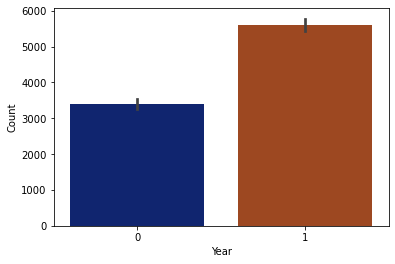

In [16]:
sns.barplot('Year','Count',data=bikes,palette="dark")
plt.show()

Bike sharing is more in 2019

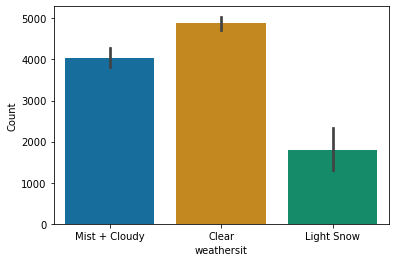

In [17]:
sns.barplot('weathersit','Count',data=bikes,palette="colorblind")
plt.show()

Bike Rentals are more in clear/partly cloudy

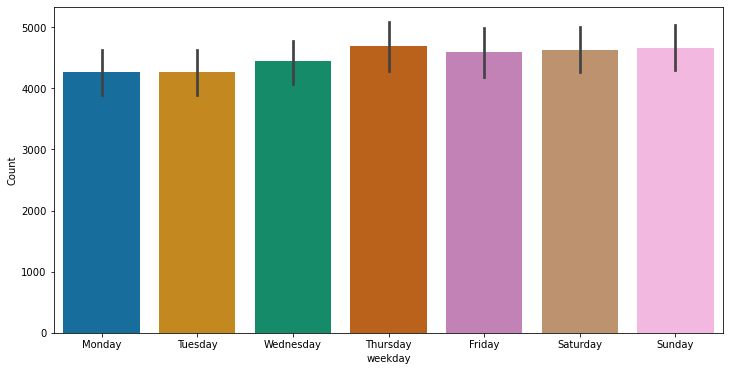

In [18]:
plt.figure(figsize=(12,6))
sns.barplot('weekday','Count',data=bikes,palette="colorblind")
plt.show()

BIKE RENTALS ARE MORE ON THURSDAY

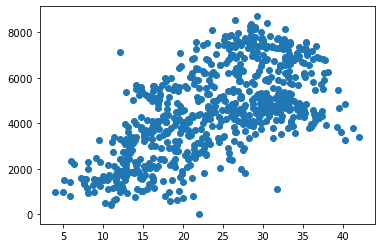

In [19]:
plt.scatter('atemp','Count',data=bikes)
plt.show()

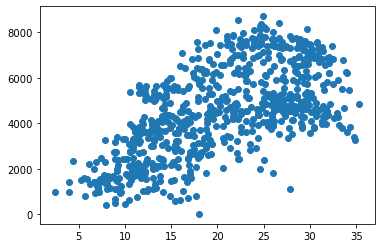

In [20]:
plt.scatter('temp','Count',data=bikes)
plt.show()

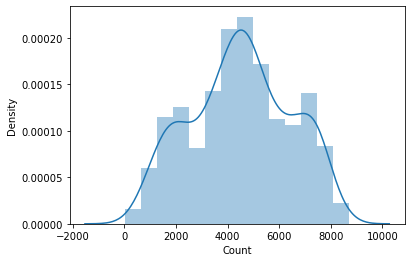

In [21]:
sns.distplot(bikes['Count'])
plt.show()

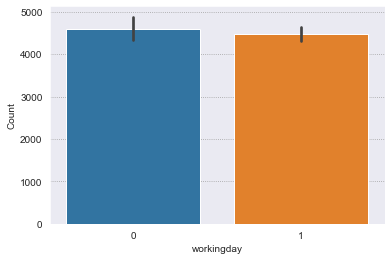

In [22]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.barplot(x='workingday',y='Count',data=bikes)
plt.show()

Bikes rented more on working dau

<AxesSubplot:xlabel='Month', ylabel='Count'>

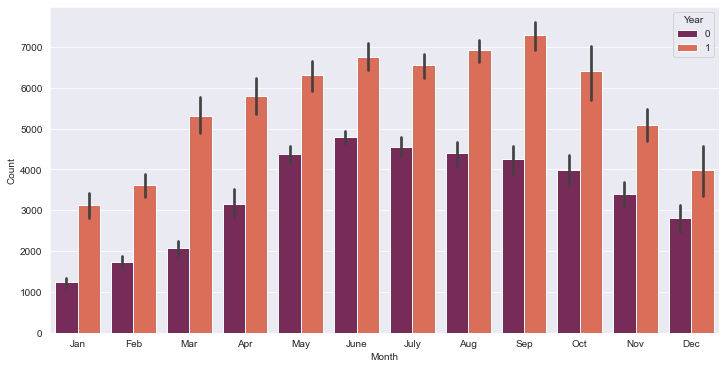

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y='Count',data=bikes,hue='Year',palette='rocket')

Bike sharing is more in the month of September

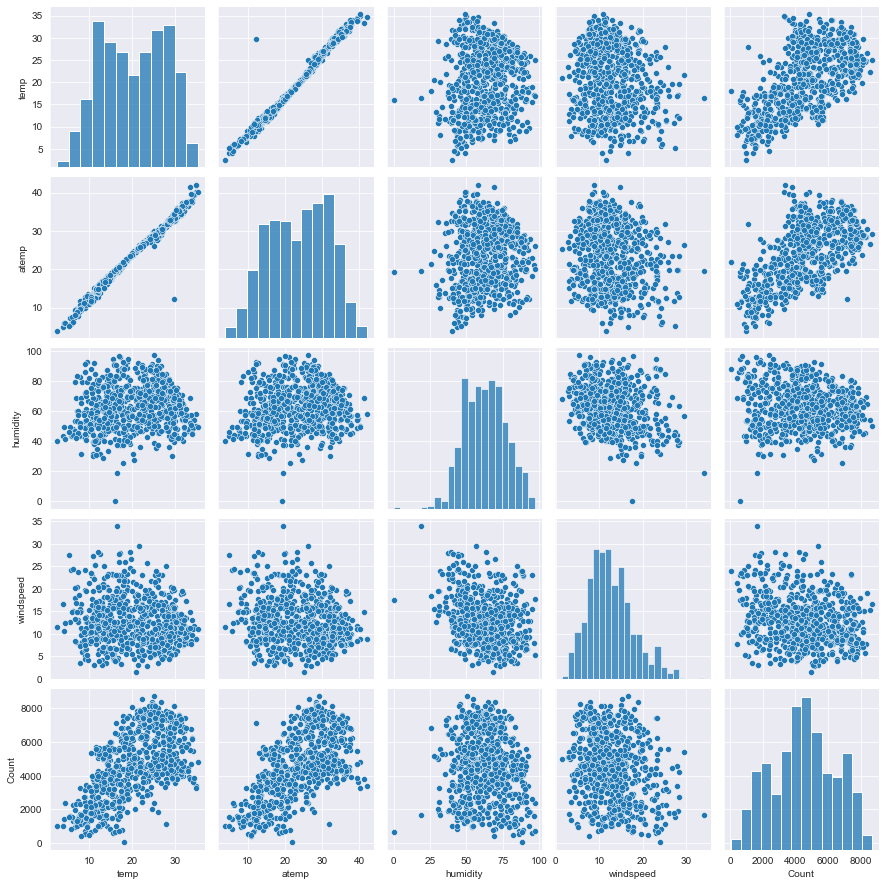

In [24]:
# Pair Plot for numerical variables
sns.pairplot(bikes,vars=['temp','atemp','humidity','windspeed',"Count"])
plt.show()

# Count variable is more related to temperature

# Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

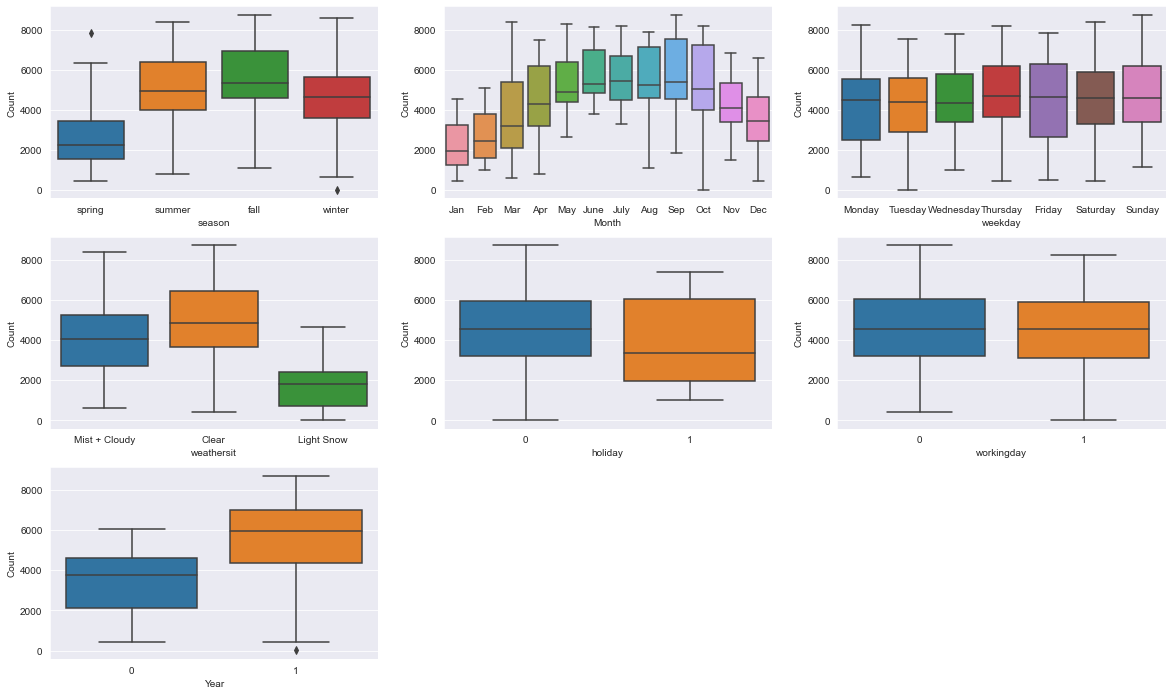

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'Count', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'Month', y = 'Count', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'Count', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'Count', data = bikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'Count', data = bikes)


plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'Count', data = bikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'Year', y = 'Count', data = bikes)

plt.show()

 OBSERVATIONS:
 
        1. Bike rentals are more in partly clear  weather.
        2. People are renting more on working day.
        3. Mostly on Thursday, Friday,Saturday and Sunday
        4. Rentals more on fall season
        5. More on June to Sep
        6. More rentals in 2019.
        
    

## Visualizing the continuous variables 'atemp','humidity','windspeed' w.r.t 'count ' 

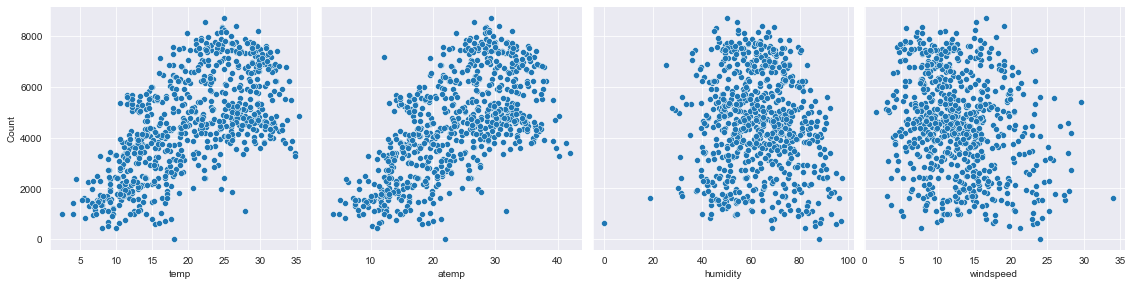

In [26]:
sns.pairplot(bikes, x_vars=['temp','atemp','humidity','windspeed'], y_vars='Count',size=4, aspect=1 )
plt.show()

# Conclusions:
    
      
     Bike rentals shows +ve correlation with temperatures
    
     

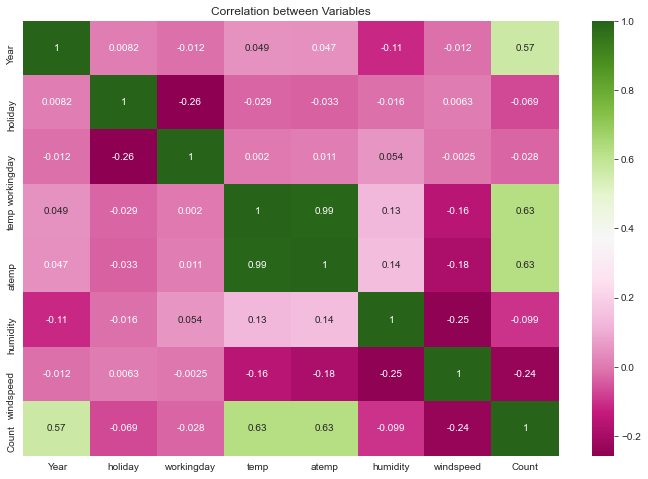

In [27]:
# Heatmap to show correlation
plt.figure(figsize=(12,8))
sns.heatmap(bikes.corr(),annot=True,cmap='PiYG')
plt.title("Correlation between Variables")
plt.show()

# CONCLUSIONS:
    
    1. High correlation between temp and atemp (0.99). We need to drop one of them (atemp) to avoid multicollinearity
    

In [28]:
# Dropping the variable 'atemp' 
bikes=bikes.drop('atemp',1)


In [29]:
bikes.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Count
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [30]:
bikes.shape

(730, 11)

# Step-4 Data preparation


 CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

In [31]:
# Get the dummy variables for the 'season' and store it in a new variable - 'Seasons'
Seasons = pd.get_dummies(bikes['season'],drop_first=True)


In [32]:
# Get the dummy variables for the 'month' and store it in a new variable - 'Months'
Months = pd.get_dummies(bikes['Month'],drop_first=True)

In [33]:
# Get the dummy variables for the 'Weekday' and store it in a new variable - 'Weekdays'
Weekdays = pd.get_dummies(bikes['weekday'],drop_first=True)

In [34]:
# Get the dummy variables for the 'weathersit' and store it in a new variable - 'Weatherstatus'
Weatherstatus = pd.get_dummies(bikes['weathersit'],drop_first=True)

In [35]:
bikes

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,Count
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Friday,1,Mist + Cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,Dec,0,Saturday,0,Mist + Cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,Dec,0,Sunday,0,Mist + Cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,Dec,0,Monday,1,Clear,10.489153,48.3333,23.500518,1796


In [36]:
# Add the results to the original bike_share dataframe

bikes = pd.concat([bikes, Seasons, Months, Weekdays, Weatherstatus], axis = 1)

In [37]:
bikes.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'Count', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [38]:
bikes.head(3)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0


In [39]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   Year           730 non-null    int64  
 2   Month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  Count          730 non-null    int64  
 11  spring         730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  winter         730 non-null    uint8  
 14  Aug            730 non-null    uint8  
 15  Dec            730 non-null    uint8  
 16  Feb            730 non-null    uint8  
 17  Jan            730 non-null    uint8  
 18  July      

In [40]:
# Drop original columns season, month, weekday,weathersit 
bikes.drop(["season", "Month","weekday","weathersit"], axis=1,inplace=True)

In [41]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   humidity       730 non-null    float64
 5   windspeed      730 non-null    float64
 6   Count          730 non-null    int64  
 7   spring         730 non-null    uint8  
 8   summer         730 non-null    uint8  
 9   winter         730 non-null    uint8  
 10  Aug            730 non-null    uint8  
 11  Dec            730 non-null    uint8  
 12  Feb            730 non-null    uint8  
 13  Jan            730 non-null    uint8  
 14  July           730 non-null    uint8  
 15  June           730 non-null    uint8  
 16  Mar            730 non-null    uint8  
 17  May            730 non-null    uint8  
 18  Nov       

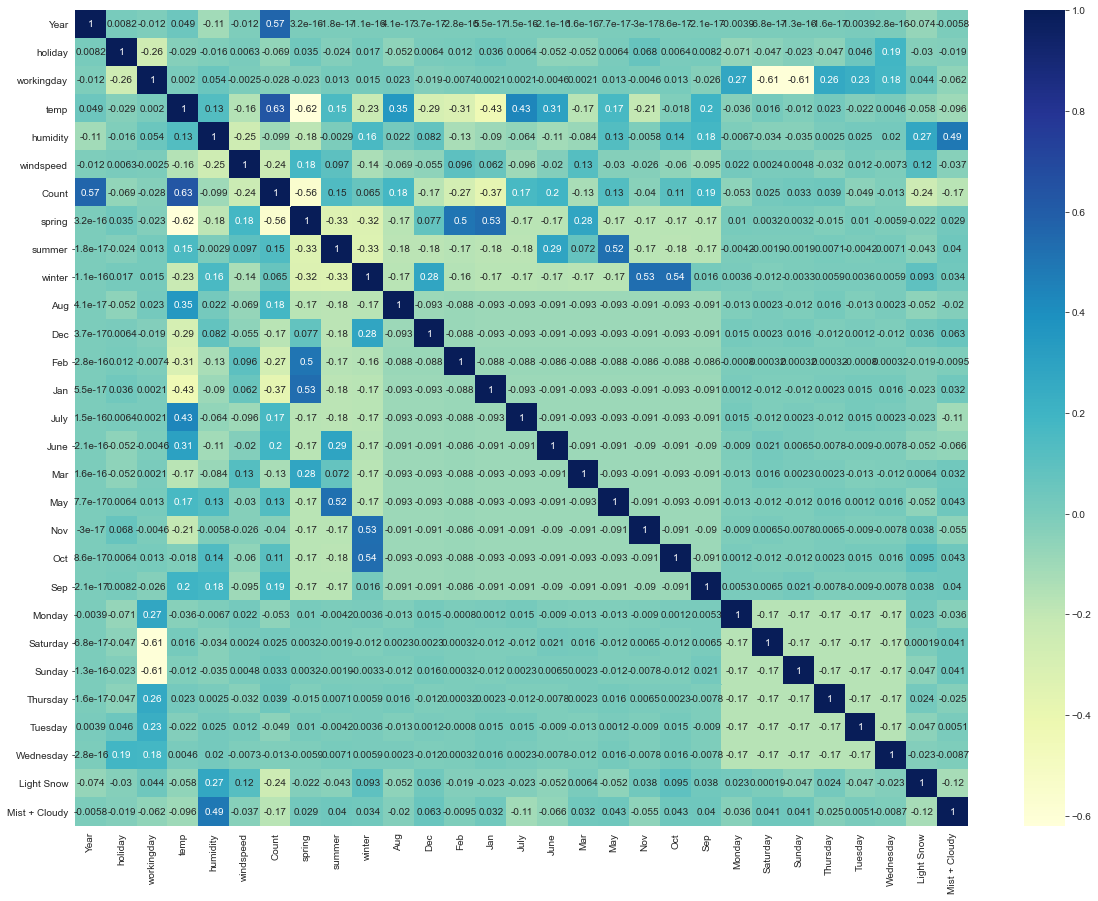

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(bikes.corr(), annot = True, cmap='YlGnBu',annot_kws={'size':10})
plt.show()

CONCLUSIONS:
    
    High correlation can be seen  count and year, temp and year, Nov, May,oct, Jan, humidity, mist+clody
    

# STEP -5  Splitting the Data into Training and Testing Sets

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [44]:
bikes_train.shape

(510, 29)

In [45]:
bikes_test.shape

(220, 29)

##  Step-5 Rescaling the features

In [46]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [47]:
#Instantiate an object

scaler = MinMaxScaler()

#Create a list of numeric variables
# Apply scaler() to all the columns
num_vars=['temp','humidity','windspeed','Count']

#Fit on data
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,Count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
#Checking numeric variables(min and max) after scaling
bikes_train.describe()

,Year,holiday,workingday,temp,humidity,windspeed,Count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


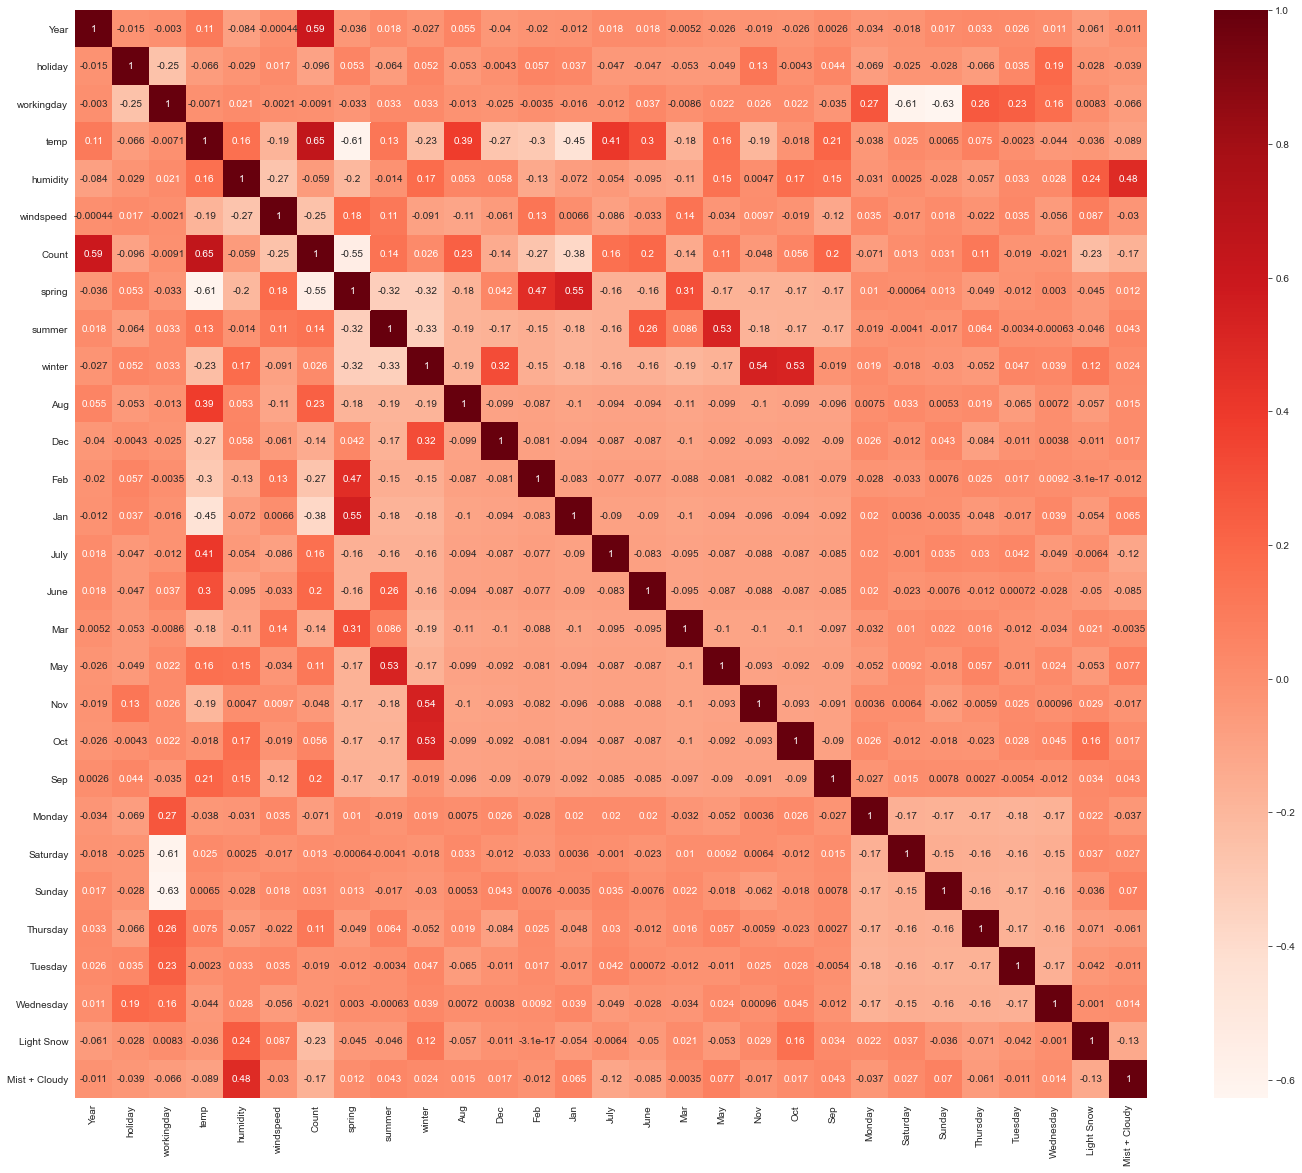

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 20))
sns.heatmap(bikes_train.corr(), annot = True, cmap="Reds")
plt.show()

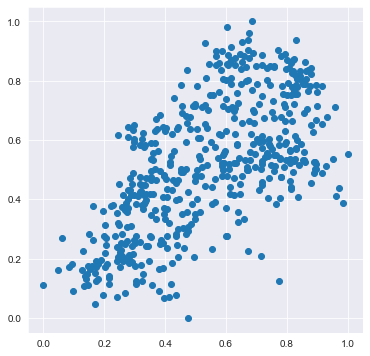

In [50]:
# Scatter plot between temp and Count
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.temp, bikes_train.Count)
plt.show()

## Dividing into X and Y sets for the model building

In [51]:
y_train = bikes_train.pop('Count')
X_train = bikes_train

In [52]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Count, dtype: float64

In [53]:
X_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


# Step 6: Building a linear model

In [54]:
# IMPORTING RFE AND LINEARREGRESSION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe=RFE(lm,15)  # Running RFE
rfe=rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [57]:
col=X_train.columns[rfe.support_]

In [58]:
col

Index(['Year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

##  Step -7 BUILDING MODEL USING STATSMODEL, FOR THE DETAILED STATISTICS

In [60]:
X_train_rfe=X_train[col]

In [61]:
# Adding a constant variable
import statsmodels.api as sm

X_train_rfe=sm.add_constant(X_train_rfe)

In [62]:
# Running the linear model
lm=sm.OLS( y_train, X_train_rfe).fit()

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.15e-189
Time:                        19:38:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe=X_train_rfe.drop(['const'], axis=1)
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending =False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist + Cloudy,2.32
0,Year,2.09
11,Nov,1.85
9,Jan,1.75


In [65]:
# humidity has high vif. So drop the variable
X_train_new=X_train_rfe.drop('humidity',1)

In [66]:

# Adding a constant variable
import statsmodels.api as sm

X_train_rfe1=sm.add_constant(X_train_new)

# Running the linear model
lm1=sm.OLS( y_train, X_train_rfe1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.75e-186
Time:                        19:38:18   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618

In [67]:
# Calcuate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe1=X_train_rfe1.drop(['const'], axis=1)
vif=pd.DataFrame()
X=X_train_rfe1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending =False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,Year,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Mist + Cloudy,1.57


# conclusions:

    In summary p value for temp is 0.00 and slightly high  VIF for temp=5.17 . We can keep this for now.

In [68]:
bikes.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'Count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

## Model building adding June and Aug which has +ve correlation.

In [69]:
# Adding sunday variable
X_train_rfe1['June']=X_train['June']

In [70]:
# Adding a constant to X_train_rfe
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm2 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.37e-185
Time:                        19:38:18   Log-Likelihood:                 504.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     494   BIC:                            -910.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2437      0.033      7.472      0.000       0.180       0.308
Year              0.2344      0.008     28.628      0.000       0.218       0.250
holiday          -0.0920      0.026     -3.524      0.000      -0.143      -0.041
temp              0.4417      0.038     11.576      0.000       0.367       0.517
windspeed        -0.1586      0.025     -6.273      0.000      -0.208      -0.109
spring           -0.0709      0.022     -3.285      0.001      -0.113      -0.028
summer            0.0355      0.016      2.261      0.024       0.005       0.066
winter            0.0869      0.018      4.827      0.000       0.052       0.122
Dec              -0.0425      0.018     -2.385      0.017      -0.077      -0.007
Jan              -0.0495      0.018     -2.679      0.008      -0.086      -0.013
July             -0.0512      0.019     -2.684      0.008      -0.089      -0.014
Nov              -0.0392      0.019     -2.043      0.042      -0.077      -0.002
Sep               0.0681      0.017      3.941      0.000       0.034       0.102
Light Snow       -0.2919      0.025    -11.831      0.000      -0.340      -0.243
Mist + Cloudy    -0.0803      0.009     -9.175      0.000      -0.097      -0.063
June             -0.0043      0.017     -0.251      0.802      -0.038       0.030
==============================================================================
Omnibus:                       68.973   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.512
Skew:                          -0.696   Prob(JB):                     9.41e-38
Kurtosis:                       5.467   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value increased after adding june. We should drop it.



In [71]:
X_train_rfe1=X_train_rfe1.drop("June",1)

In [72]:
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1


In [73]:
# ADD August variable
X_train_rfe1['Aug']=X_train['Aug']
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy,Aug
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0,1
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1,0
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1,0


In [74]:
# Adding a constant to X_train_rfe
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm3 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.61e-185
Time:                        19:38:18   Log-Likelihood:                 505.02
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     494   BIC:                            -910.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2367      0.035      6.693      0.000       0.167       0.306
Year              0.2343      0.008     28.644      0.000       0.218       0.250
holiday          -0.0914      0.026     -3.505      0.000      -0.143      -0.040
temp              0.4370      0.036     11.994      0.000       0.365       0.509
windspeed        -0.1582      0.025     -6.260      0.000      -0.208      -0.109
spring           -0.0624      0.027     -2.350      0.019      -0.115      -0.010
summer            0.0443      0.023      1.947      0.052      -0.000       0.089
winter            0.0950      0.023      4.128      0.000       0.050       0.140
Dec              -0.0422      0.018     -2.371      0.018      -0.077      -0.007
Jan              -0.0500      0.018     -2.720      0.007      -0.086      -0.014
July             -0.0402      0.025     -1.583      0.114      -0.090       0.010
Nov              -0.0386      0.019     -2.009      0.045      -0.076      -0.001
Sep               0.0766      0.022      3.476      0.001       0.033       0.120
Light Snow       -0.2913      0.025    -11.807      0.000      -0.340      -0.243
Mist + Cloudy    -0.0804      0.009     -9.208      0.000      -0.098      -0.063
Aug               0.0138      0.024      0.565      0.572      -0.034       0.062
==============================================================================
Omnibus:                       68.638   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.285
Skew:                          -0.692   Prob(JB):                     1.05e-37
Kurtosis:                       5.469   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value increased after adding August. We should drop it.

In [75]:
X_train_rfe1=X_train_rfe1.drop("Aug",1)
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1


In [76]:
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1


Model building adding Feb which has +ve correlation.

In [77]:
# ADD Feb variable
X_train_rfe1['Feb']=X_train['Feb']
# Adding a constant to X_train_rfe
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm4 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.44e-185
Time:                        19:38:18   Log-Likelihood:                 506.43
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2587      0.033      7.830      0.000       0.194       0.324
Year              0.2348      0.008     28.781      0.000       0.219       0.251
holiday          -0.0891      0.026     -3.421      0.001      -0.140      -0.038
temp              0.4221      0.037     11.277      0.000       0.349       0.496
windspeed        -0.1602      0.025     -6.353      0.000      -0.210      -0.111
spring           -0.0605      0.022     -2.712      0.007      -0.104      -0.017
summer            0.0314      0.016      2.015      0.044       0.001       0.062
winter            0.0852      0.018      4.741      0.000       0.050       0.121
Dec              -0.0527      0.019     -2.835      0.005      -0.089      -0.016
Jan              -0.0706      0.022     -3.238      0.001      -0.113      -0.028
July             -0.0491      0.018     -2.654      0.008      -0.085      -0.013
Nov              -0.0447      0.019     -2.314      0.021      -0.083      -0.007
Sep               0.0672      0.017      3.927      0.000       0.034       0.101
Light Snow       -0.2927      0.025    -11.899      0.000      -0.341      -0.244
Mist + Cloudy    -0.0800      0.009     -9.213      0.000      -0.097      -0.063
Feb              -0.0385      0.022     -1.749      0.081      -0.082       0.005
==============================================================================
Omnibus:                       73.963   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.022
Skew:                          -0.740   Prob(JB):                     6.65e-41
Kurtosis:                       5.552   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p-value increased after adding Feb. We should drop it.

In [78]:
X_train_rfe1=X_train_rfe1.drop("Feb", 1)
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1


In [79]:
# ADD 'May' variable
X_train_rfe1['May']=X_train['May']
# Adding a constant to X_train_rfe
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm5 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.40e-185
Time:                        19:38:18   Log-Likelihood:                 505.06
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     494   BIC:                            -910.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2484      0.033      7.613      0.000       0.184       0.312
Year              0.2348      0.008     28.647      0.000       0.219       0.251
holiday          -0.0914      0.026     -3.507      0.000      -0.143      -0.040
temp              0.4339      0.037     11.691      0.000       0.361       0.507
windspeed        -0.1570      0.025     -6.190      0.000      -0.207      -0.107
spring           -0.0735      0.022     -3.370      0.001      -0.116      -0.031
summer            0.0300      0.017      1.735      0.083      -0.004       0.064
winter            0.0856      0.018      4.730      0.000       0.050       0.121
Dec              -0.0434      0.018     -2.443      0.015      -0.078      -0.008
Jan              -0.0506      0.018     -2.745      0.006      -0.087      -0.014
July             -0.0497      0.019     -2.684      0.008      -0.086      -0.013
Nov              -0.0402      0.019     -2.097      0.036      -0.078      -0.003
Sep               0.0686      0.017      4.007      0.000       0.035       0.102
Light Snow       -0.2917      0.025    -11.830      0.000      -0.340      -0.243
Mist + Cloudy    -0.0805      0.009     -9.214      0.000      -0.098      -0.063
May               0.0111      0.018      0.628      0.530      -0.024       0.046
==============================================================================
Omnibus:                       70.252   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.668
Skew:                          -0.699   Prob(JB):                     1.60e-39
Kurtosis:                       5.540   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_train_rfe1=X_train_rfe1.drop("May", 1)

### The p-value increased after adding May. We should drop it.

In [81]:
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sep,Light Snow,Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,0,1


In [82]:
# ADD workingday variable
X_train_rfe1['workingday']=X_train['workingday']
# Adding a constant to X_train_rfe
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm7 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.69e-186
Time:                        19:38:18   Log-Likelihood:                 507.84
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     494   BIC:                            -915.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2627      0.033      8.000      0.000       0.198       0.327
Year              0.2343      0.008     28.811      0.000       0.218       0.250
holiday          -0.1087      0.027     -4.046      0.000      -0.161      -0.056
temp              0.4373      0.036     12.112      0.000       0.366       0.508
windspeed        -0.1589      0.025     -6.323      0.000      -0.208      -0.110
spring           -0.0715      0.021     -3.341      0.001      -0.114      -0.029
summer            0.0356      0.015      2.305      0.022       0.005       0.066
winter            0.0880      0.018      4.915      0.000       0.053       0.123
Dec              -0.0444      0.018     -2.514      0.012      -0.079      -0.010
Jan              -0.0500      0.018     -2.734      0.006      -0.086      -0.014
July             -0.0506      0.018     -2.745      0.006      -0.087      -0.014
Nov              -0.0387      0.019     -2.029      0.043      -0.076      -0.001
Sep               0.0683      0.017      4.007      0.000       0.035       0.102
Light Snow       -0.2927      0.025    -11.935      0.000      -0.341      -0.245
Mist + Cloudy    -0.0819      0.009     -9.414      0.000      -0.099      -0.065
workingday       -0.0223      0.009     -2.413      0.016      -0.040      -0.004
==============================================================================
Omnibus:                       74.623   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.133
Skew:                          -0.766   Prob(JB):                     5.66e-39
Kurtosis:                       5.437   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Calcuate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe1=X_train_rfe1.drop(['const'], axis=1)
vif=pd.DataFrame()
X=X_train_rfe1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending =False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,4.69
14,workingday,3.58
4,spring,3.08
6,winter,3.08
5,summer,2.33
0,Year,2.07
10,Nov,1.82
8,Jan,1.66
9,July,1.59


In [84]:
# Drop July variable.
X_train_rfe1=X_train_rfe1.drop("July",1)

In [85]:
X_train_rfe1=sm.add_constant(X_train_rfe1)

# Creating a LR object which we will use to fit the line.
lm8 = sm.OLS(y_train, X_train_rfe1).fit()

#Checking the summary
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.10e-185
Time:                        19:38:18   Log-Likelihood:                 503.98
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     495   BIC:                            -914.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2552      0.033      7.748      0.000       0.190       0.320
Year              0.2349      0.008     28.703      0.000       0.219       0.251
holiday          -0.1073      0.027     -3.971      0.000      -0.160      -0.054
temp              0.4233      0.036     11.765      0.000       0.353       0.494
windspeed        -0.1596      0.025     -6.308      0.000      -0.209      -0.110
spring           -0.0598      0.021     -2.832      0.005      -0.101      -0.018
summer            0.0505      0.015      3.472      0.001       0.022       0.079
winter            0.1000      0.017      5.721      0.000       0.066       0.134
Dec              -0.0449      0.018     -2.528      0.012      -0.080      -0.010
Jan              -0.0522      0.018     -2.839      0.005      -0.088      -0.016
Nov              -0.0384      0.019     -2.004      0.046      -0.076      -0.001
Sep               0.0820      0.016      4.998      0.000       0.050       0.114
Light Snow       -0.2936      0.025    -11.894      0.000      -0.342      -0.245
Mist + Cloudy    -0.0804      0.009     -9.203      0.000      -0.098      -0.063
workingday       -0.0220      0.009     -2.365      0.018      -0.040      -0.004
==============================================================================
Omnibus:                       79.276   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.237
Skew:                          -0.813   Prob(JB):                     3.62e-41
Kurtosis:                       5.475   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Calcuate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe1=X_train_rfe1.drop(['const'], axis=1)
vif=pd.DataFrame()
X=X_train_rfe1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending =False)
vif

,Features,VIF
2,temp,4.83
3,windspeed,4.68
13,workingday,3.58
4,spring,2.94
6,winter,2.90
0,Year,2.07
5,summer,2.00
9,Nov,1.82
8,Jan,1.66
12,Mist + Cloudy,1.57


# Residual Analysis

In [87]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)
#X_train_lm5.columns
X_train_rfe1

,const,Year,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,Nov,Sep,Light Snow,Mist + Cloudy,workingday
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0,0,1
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,1
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,1
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,1
350,1.0,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,1,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,0,0,0,1,1


## The best model is lm8. So lm8 model is selected for further analysis.

In [88]:
y_train_pred = lm8.predict(X_train_rfe1)

In [89]:
X_train_rfe1.shape

(510, 15)

Text(0.5, 0, 'ERRORS')

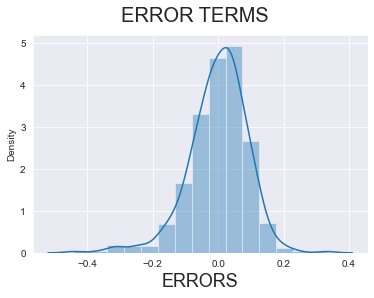

In [90]:
# Plot the histogram of the error terms
fig=plt.figure()
sns.distplot((y_train-y_train_pred), bins=15)  
fig.suptitle("ERROR TERMS", fontsize=20)
plt.xlabel("ERRORS", fontsize=18)

# Step-8 Making Predictions Using the Final Model(Test data)

Applying the scaling on the test sets¶

In [91]:
num_vars=['temp','humidity','windspeed','Count']

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

In [92]:
bikes_test.describe()

,Year,holiday,workingday,temp,humidity,windspeed,Count,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [93]:
y_test=bikes_test.pop('Count')
X_test=bikes_test

In [94]:
# Checking the values
X_test.head()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: Count, dtype: float64

In [96]:
#X_test_pred=sm.add_constant(X_test)

In [97]:
#X_test_pred

In [98]:
X_train_rfe1.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'workingday'],
      dtype='object')

In [99]:
X_train_rfe1.drop('const', axis=1,inplace=True)

In [100]:
X_test_new=X_test[X_train_rfe1.columns]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
X_test_new.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'workingday'],
      dtype='object')

In [102]:
# Making predictions using the model
y_pred_lm = lm8.predict(X_test_new)

## Step-8 Model Evaluation

 Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

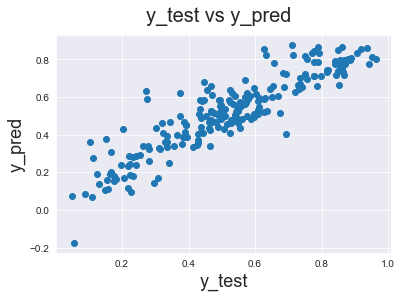

In [103]:
fig = plt.figure()
plt.scatter(y_test,y_pred_lm)

fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)  

Text(0, 0.5, 'y_pred')

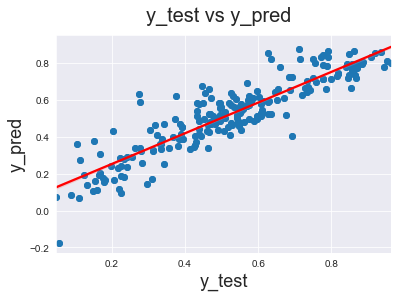

In [104]:
# Plotting y_test and y_pred to understand the spread and fitting the best fit
fig = plt.figure()
plt.scatter(y_test,y_pred_lm)
sns.regplot(x=y_test, y=y_pred_lm, ci=52, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

In [105]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: Count, Length: 220, dtype: float64

In [106]:
y_pred_lm

184    0.406078
535    0.875541
299    0.438148
221    0.552163
152    0.565813
         ...   
702    0.697691
127    0.520014
640    0.794955
72     0.281296
653    0.735899
Length: 220, dtype: float64

In [107]:
from sklearn.metrics import r2_score

In [108]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true=y_train, y_pred= y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred_lm))

0.008113124018950712
0.00885892032303634


# conclusions:
### Mean squared error of train and test data is almost equal to zero

## Rsquare value of test and train data

In [109]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred_lm))

0.8385960790469892
0.8147222876870222


## Conclusions:
    
    R2 value of 
       Train - 83.85%
       Test  -  81.4

CONCLUSIONS:
    
    1.The R-squared value of the train set is 83.85% whereas the test set has a value of 81.47% which suggests that our model broadly
      explains the variance quite accurately on the test set and thus we can conclude that it is a good model.
      
      
    
    2. We can see demand for bikes increases based on below variables
       a. Year
       b. Temp
       c. Summer 
       d. Winter and Spring
       e. September months
       
    3. Demand for bikes decreases on below variables
       a. Holiday
       b. Windspeed
       c. In the month of December, Jan and Nov
       d. Light snow
       e. Mist+cloudy
       
    
    4. Mean squared error is closed to 0 on both training and test data.
    5. It mainly depends on temperature.
    6. One of the recommendations based on this model are that there should be 
      aggressive marketing in the summer and spring season to get more rentals.
    7. Rentals are more in 2019 than 2018. So should work out keep old customers
    